We solve $u_t=u_{xx}$ on $[-1,1]$ subject to the Dirichlet conditions $u(-1,t)=0$, $u(1,t)=2$. 

In [1]:
m = 100
include("../FNC.jl")
x,Dx,Dxx = FNC.diffcheb(m,[-1,1]);

Our next step is to write a function that defines $\mathbf{f}$. Since the boundary values are given explicitly, there is no need to "solve" for them---we just append them to each end of the vector.

In [2]:
extend(v) = [0;v;2];

We can also define the inverse operation of chopping off the boundary values from a full vector.  Note that the indexing starts at 1 and ends at  $m+1$ for the extended vector.

In [3]:
chop(u) = u[2:m];

All the pieces are now in place to define and solve the IVP.

In [4]:
f = function (v,p,t)
    u = extend(v)
    phi = Dxx*u
    return chop(phi)
end
u0 = @. 1 + sin(pi/2*x) + 3*(1-x^2)*exp(-4*x^2);

using DifferentialEquations
V = solve(ODEProblem(f,chop(u0),(0.,0.15)));

We extend the solution to the boundaries at each time, then plot.

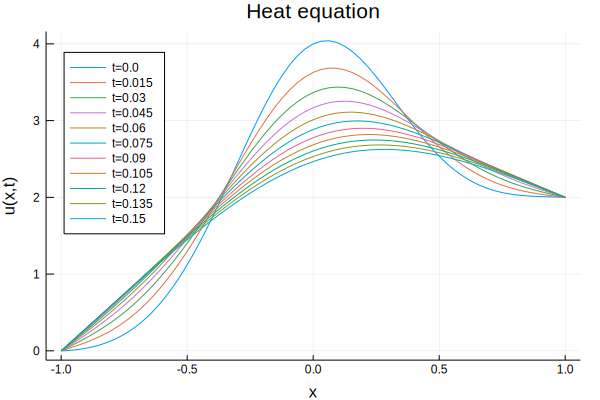

In [5]:
t = range(0,stop=0.15,length=11) 
U = hcat( (extend(V(t)) for t in t)... )

using Plots
plot(x,U,label=["t=$t" for t in t],
    xaxis=("x"), yaxis=("u(x,t)"), title="Heat equation",leg=:topleft)